# Analyze mean faces per subgroup of the Balance Faces in the Wild (BFW) dataset.

Path to the images, with images stored per BFW convention, is expected.

## Add project code to PYTHONPATH, if not already there
Check that _path_package_ is set to _code_ directory on respective system

In [1]:
import pathlib
path_package=f'../'
import sys
if path_package not in sys.path:
    sys.path.append(path_package)

In [22]:
import warnings
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from tqdm import tqdm
from facebias.image import read, write, resize

%matplotlib inline

In [ ]:
font = {'font.family': 'serif',
        'font.serif' : 'Times New Roman',
        'font.color':  'darkred',
        'font.weight': 'normal',
        'font.size': 16,
        }
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_style('whitegrid', font)

## Get image paths and load

Read in the data as a pandas.DataFrame and show the first few rows.

In [49]:
dir_images = '../../data/bfw-data/bfw/bfw-cropped-aligned'
dir_subgroups = Path(f"{dir_images}").glob('*males')
dir_subgroups=list(dir_subgroups)
dir_subgroups.sort()

# Compute and Display Mean Faces


0it [00:00, ?it/s]
1it [00:10, 10.97s/it]
2it [00:23, 11.34s/it]
3it [00:35, 11.53s/it]
4it [00:45, 11.08s/it]
5it [00:55, 10.73s/it]
6it [01:04, 10.47s/it]
7it [01:14, 10.33s/it]
8it [01:25, 10.63s/it]


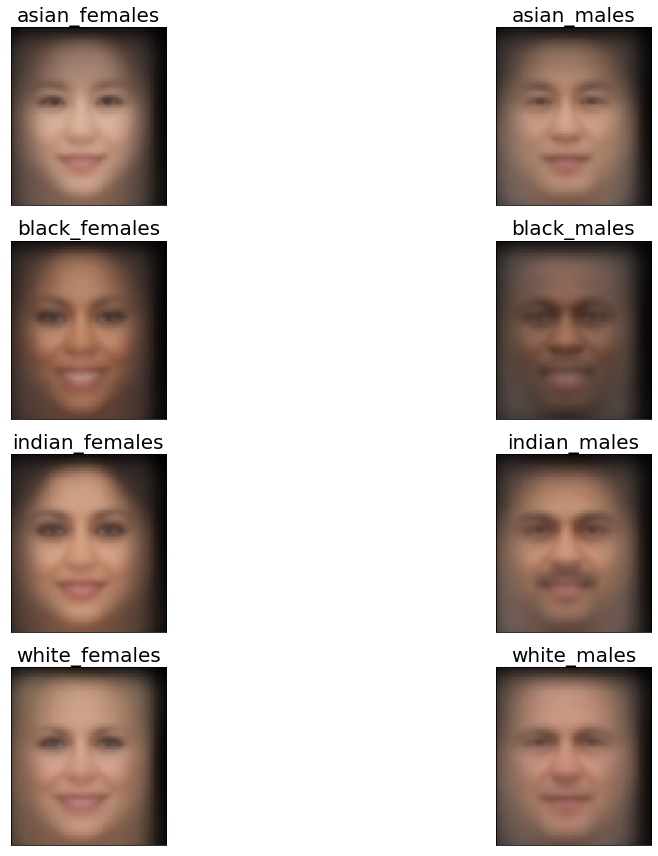

In [68]:
fig, axs = plt.subplots(4, 2, figsize=(18, 12))
mean_images = []
for dir_subgroup, ax in tqdm(zip(dir_subgroups, axs.flatten())):
    images = np.array([resize(read(f_image), 124, 108) for f_image in Path(dir_subgroup).glob("*/*.jpg")])
    mean_face = np.array(images).mean(0)
    ax.imshow(mean_face)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(str(dir_subgroup).split('/')[-1], fontsize=20)
    
    mean_images.append(mean_face)
plt.tight_layout()